In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gwsnr import GWSNR

In [2]:
gwsnr = GWSNR(snr_type='interpolation', create_new_interpolator=False, mtot_resolution=500, ratio_resolution=50, mtot_max=200, sampling_frequency=2048, minimum_frequency = 20.)

psds not given. Choosing bilby's default psds
npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_20.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_20.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_20.pickle


In [3]:
mass_1 = np.array([10.,50.,100., 200.])
ratio = np.array([0.8,0.5,0.2, 1])
gwsnr.compute_bilby_snr(mass_1=mass_1, mass_2=mass_1*ratio)

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.49it/s]


{'L1': array([115.9746314 , 310.35671092, 265.98690968,   0.        ]),
 'H1': array([ 73.76357793, 197.39680269, 169.17618882,   0.        ]),
 'V1': array([34.40403504, 93.34736252, 78.61324627,  0.        ]),
 'optimal_snr_net': array([141.68563154, 379.47399887, 324.88407391,   0.        ])}

In [4]:
# with interpolation
gwsnr.snr(mass_1=mass_1, mass_2=mass_1*ratio)

{'L1': array([115.97500235, 310.36065119, 265.99021368,   0.        ]),
 'H1': array([ 73.76381386, 197.39930883, 169.17829027,   0.        ]),
 'V1': array([34.4041247 , 93.34870658, 78.61438369,  0.        ]),
 'optimal_snr_net': array([141.68607977, 379.47885574, 324.88814843,   0.        ])}

In [5]:
nsamples = 1000
chirp_mass = np.linspace(5,80,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
total_mass = mass_1+mass_2
mass_ratio = mass_2/mass_1
# Fix luminosity distance
luminosity_distance = 80*np.ones(nsamples)
# Randomly sample everything else:
theta_jn = np.random.uniform(0,2*np.pi, size=nsamples)
ra, dec, psi, phase = np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(0,np.pi, size=nsamples), np.random.uniform(0,2*np.pi, size=nsamples), np.random.uniform(0,2*np.pi, size=nsamples)
a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl = 0,0,0,0,0,0 # Zero spin

In [6]:
# error might occur for mchirp>95., if f_min=20.
from datetime import datetime
gwsnr.multiprocessing_verbose = True
start_time = datetime.now()
bilby_ = gwsnr.compute_bilby_snr(mass_1=mass_1, mass_2=mass_1, luminosity_distance=luminosity_distance, theta_jn=theta_jn, \
                            psi=psi, phase=phase, ra=ra, dec=dec)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

  0%|                                                                       | 0/757 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████| 757/757 [00:01<00:00, 523.47it/s]

Duration: 0:00:01.494083


In [7]:
start_time = datetime.now()
mine_ = gwsnr.snr(mass_1=mass_1, mass_2=mass_1, luminosity_distance=luminosity_distance, theta_jn=theta_jn, \
            psi=psi, phase=phase, ra=ra, dec=dec)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.012600


In [8]:
bilby_['L1'][:10]

array([ 19.70897666,  85.65505558,  46.89639069,  85.67772726,
        61.53191169,  41.33672772,  13.12036383,  68.17882202,
       107.66580159,  10.76793985])

In [9]:
mine_['L1'][:10]

array([ 19.70888673,  85.65503342,  46.89673272,  85.6755658 ,
        61.52989878,  41.33553639,  13.11982306,  68.17996193,
       107.66254049,  10.76790898])

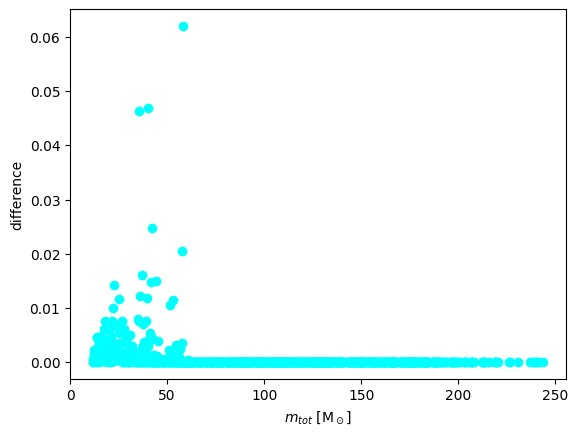

In [11]:
plt.plot(total_mass, abs(mine_['optimal_snr_net']-bilby_['optimal_snr_net']), 'o', color='cyan')
plt.xlabel(r"$m_{tot}$ [$\rm M_\odot$]")
plt.ylabel(r"difference")
# plt.ylim(0,0.4)
#plt.xlim(150,250)
plt.show()

In [12]:
import gwsnrdev
import utils
import imp
import numpy as np
import matplotlib.pyplot as plt
import njit_functions
imp.reload(gwsnrdev)
imp.reload(utils)
imp.reload(njit_functions)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_44711/1343233122.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'njit_functions' from '/Users/phurailatpamhemantakumar/phd/mypackages/gwsnr/examples/njit_functions.py'>

In [13]:
gwsnr_ = gwsnrdev.GWSNR(snr_type='interpolation', create_new_interpolator=False, mtot_resolution=500, ratio_resolution=50, mtot_max=200, sampling_frequency=2048, minimum_frequency = 20.)

psds not given. Choosing bilby's default psds
npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_20.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_20.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_20.pickle
Please be patient while the interpolator is generated
Generating interpolator for ['L1', 'H1', 'V1'] detectors


interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [01:06<00:00,  1.33s/it]


In [14]:
# error might occur for mchirp>95., if f_min=20.
from datetime import datetime
gwsnr.multiprocessing_verbose = True
start_time = datetime.now()
bilby_ = gwsnr_.compute_bilby_snr_(mass_1=mass_1, mass_2=mass_1, luminosity_distance=luminosity_distance, theta_jn=theta_jn, \
                            psi=psi, phase=phase, ra=ra, dec=dec)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:01.269674


In [15]:
start_time = datetime.now()
mine_ = gwsnr_.snr(mass_1=mass_1, mass_2=mass_1, luminosity_distance=luminosity_distance, theta_jn=theta_jn, \
            psi=psi, phase=phase, ra=ra, dec=dec)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:01.323152


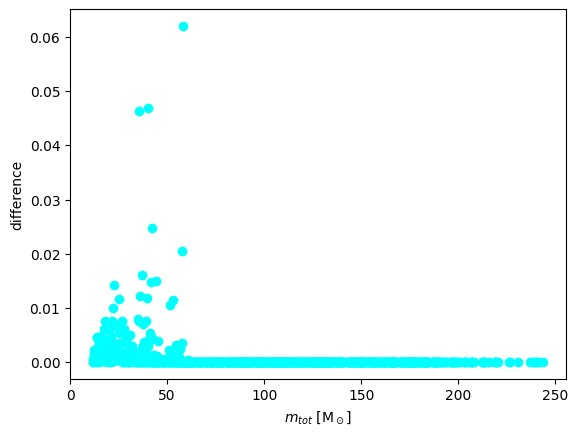

In [16]:
plt.plot(total_mass, abs(mine_['optimal_snr_net']-bilby_['optimal_snr_net']), 'o', color='cyan')
plt.xlabel(r"$m_{tot}$ [$\rm M_\odot$]")
plt.ylabel(r"difference")
# plt.ylim(0,0.4)
# plt.xlim(150,250)
plt.show()

In [85]:
gwsnr_.mtot_arr[-10:]

array([184.81584292, 184.83544242, 184.85486491, 184.87411199,
       184.89318524, 184.91208623, 184.93081653, 184.94937766,
       184.96777115, 184.98599853])

In [86]:
gwsnr.mtot_arr[-10:]

array([199.82678777, 199.84675165, 199.86653212, 199.88613089,
       199.90554962, 199.92478996, 199.94385355, 199.96274202,
       199.98145697, 200.        ])